In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\ml\da\AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
print(df.nunique())
print(df.shape)

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64
(48895, 16)


In [5]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.dropna(axis=1,inplace=True)
df.head(5)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [7]:
df.dropna(axis=0,inplace=True)
df.head(5)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [8]:
print(df.isna().sum())

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [9]:
df[df.duplicated()]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365


152.7206871868289
585.6728788988286


C:\Users\preeti\AppData\Local\Temp\ipykernel_27420\1706276776.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

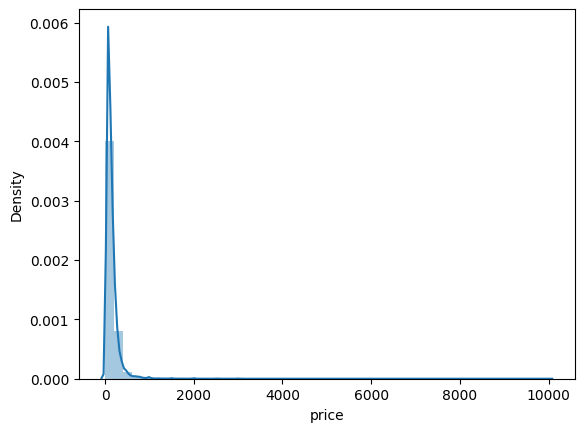

In [10]:
print(df['price'].mean())
print(df['price'].kurt())
sns.distplot(df['price'])

<Axes: >

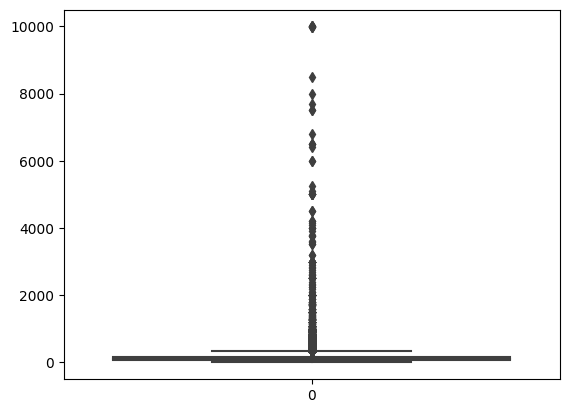

In [11]:
sns.boxplot(df['price'])

-90.0 334.0


<Axes: >

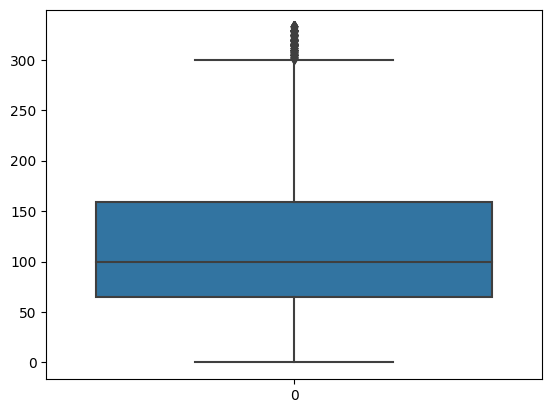

In [12]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
iqr=q3-q1
min_val=q1-1.5*iqr
max_val=q3+1.5*iqr
print(min_val,max_val)
df=df[(df['price']>min_val)&(df['price']<max_val)]
sns.boxplot(df['price'])

In [13]:
df['price'].value_counts(bins=5)

price
(66.6, 133.2]     18083
(-0.334, 66.6]    11732
(133.2, 199.8]     9295
(199.8, 266.4]     4859
(266.4, 333.0]     1949
Name: count, dtype: int64

<Axes: xlabel='neighbourhood_group', ylabel='count'>

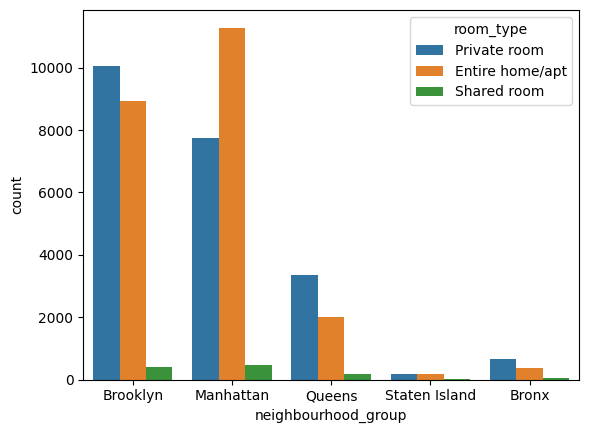

In [17]:
sns.countplot(data=df,x='neighbourhood_group',hue='room_type')

<Axes: xlabel='room_type', ylabel='count'>

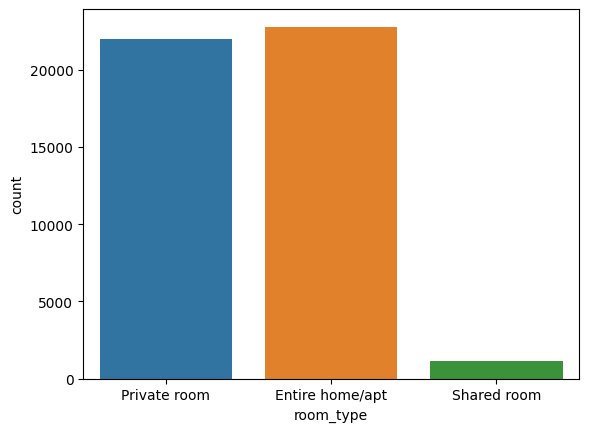

In [15]:
sns.countplot(data=df,x='room_type')

<Axes: ylabel='count'>

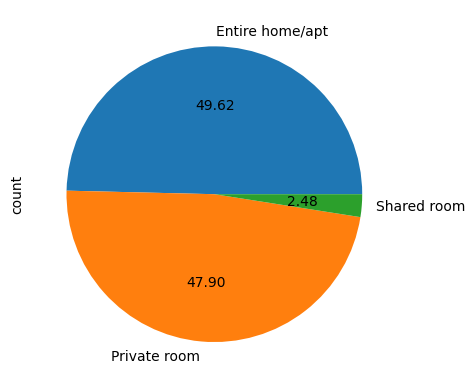

In [19]:
df['room_type'].value_counts().plot(kind='pie',autopct="%.2f")

<Axes: xlabel='price', ylabel='Count'>

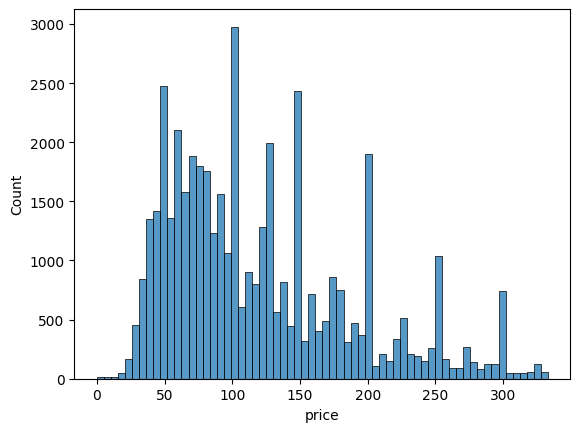

In [31]:
sns.histplot(data=df[df['price']<10000],x='price')

C:\Users\preeti\AppData\Local\Temp\ipykernel_27420\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

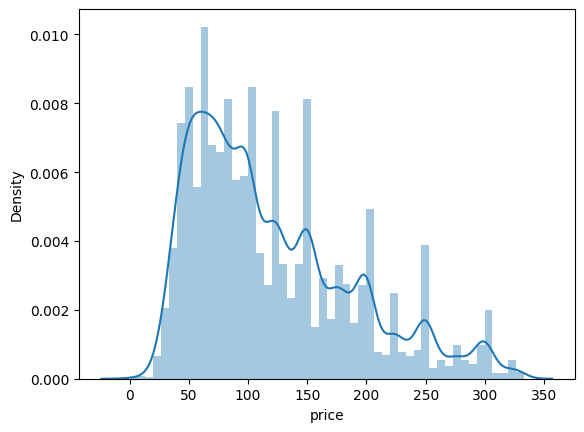

In [24]:
sns.distplot(df['price'])

<Axes: >

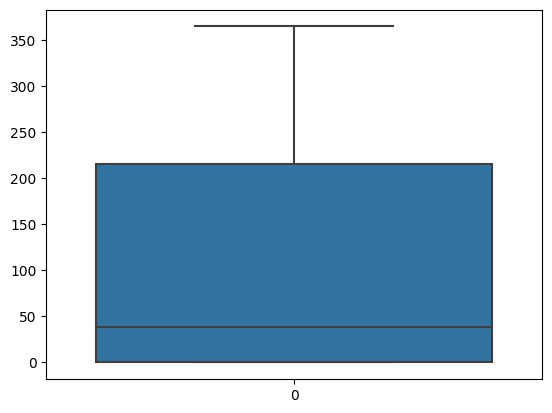

In [29]:
sns.boxplot(df['availability_365'])

In [34]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='class', ylabel='fare'>

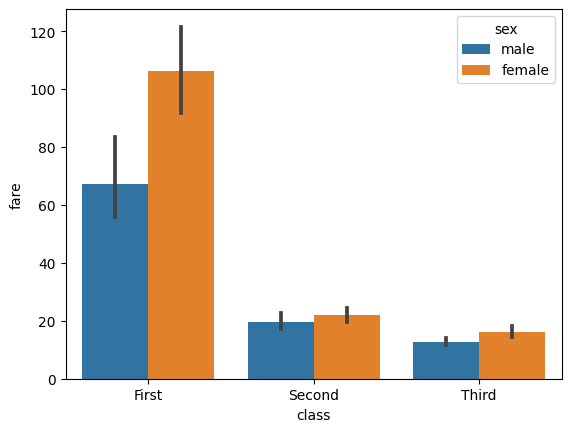

In [39]:
sns.barplot(data=df,x='class',y='fare',hue='sex')

<Axes: xlabel='class', ylabel='fare'>

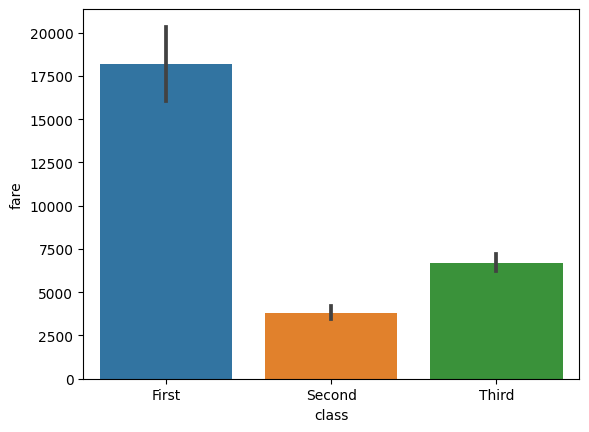

In [40]:
sns.barplot(data=df,x='class',y='fare',estimator='sum')

<Axes: xlabel='class', ylabel='age'>

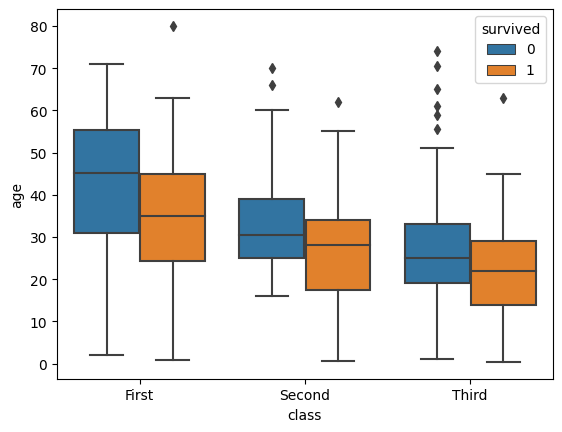

In [45]:
sns.boxplot(data=df,x='class',y='age',hue='survived')

class   First  Second  Third
class                       
First     1.0    -1.0   -1.0
Second   -1.0     1.0    1.0
Third    -1.0     1.0    1.0


<Axes: xlabel='class', ylabel='survived'>

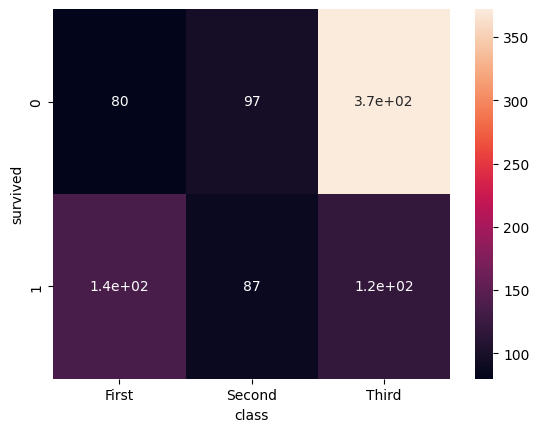

In [60]:
x=pd.crosstab(df['survived'],df['class'])
print(x.corr())
sns.heatmap(x,annot=True)

<Axes: >

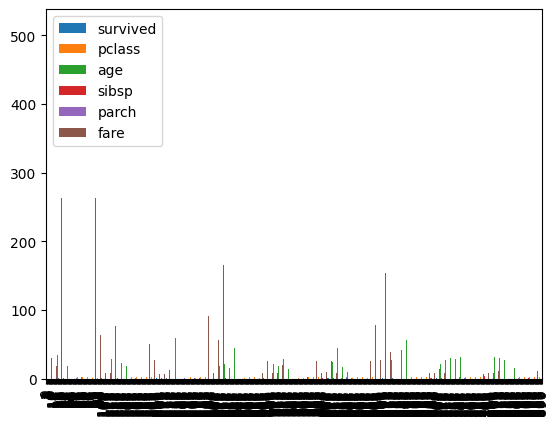

In [62]:
df.plot(kind='bar')

<Axes: >

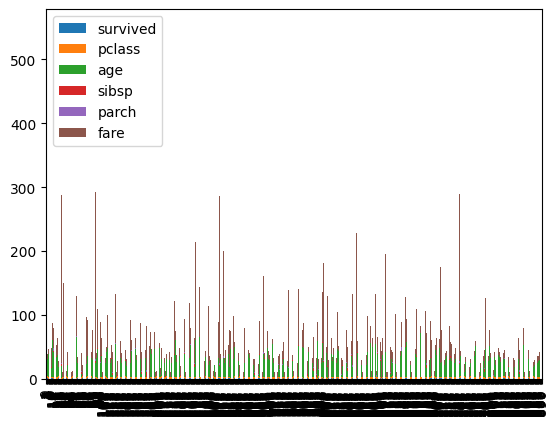

In [66]:
df.plot(kind='bar',stacked='True')

C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weig

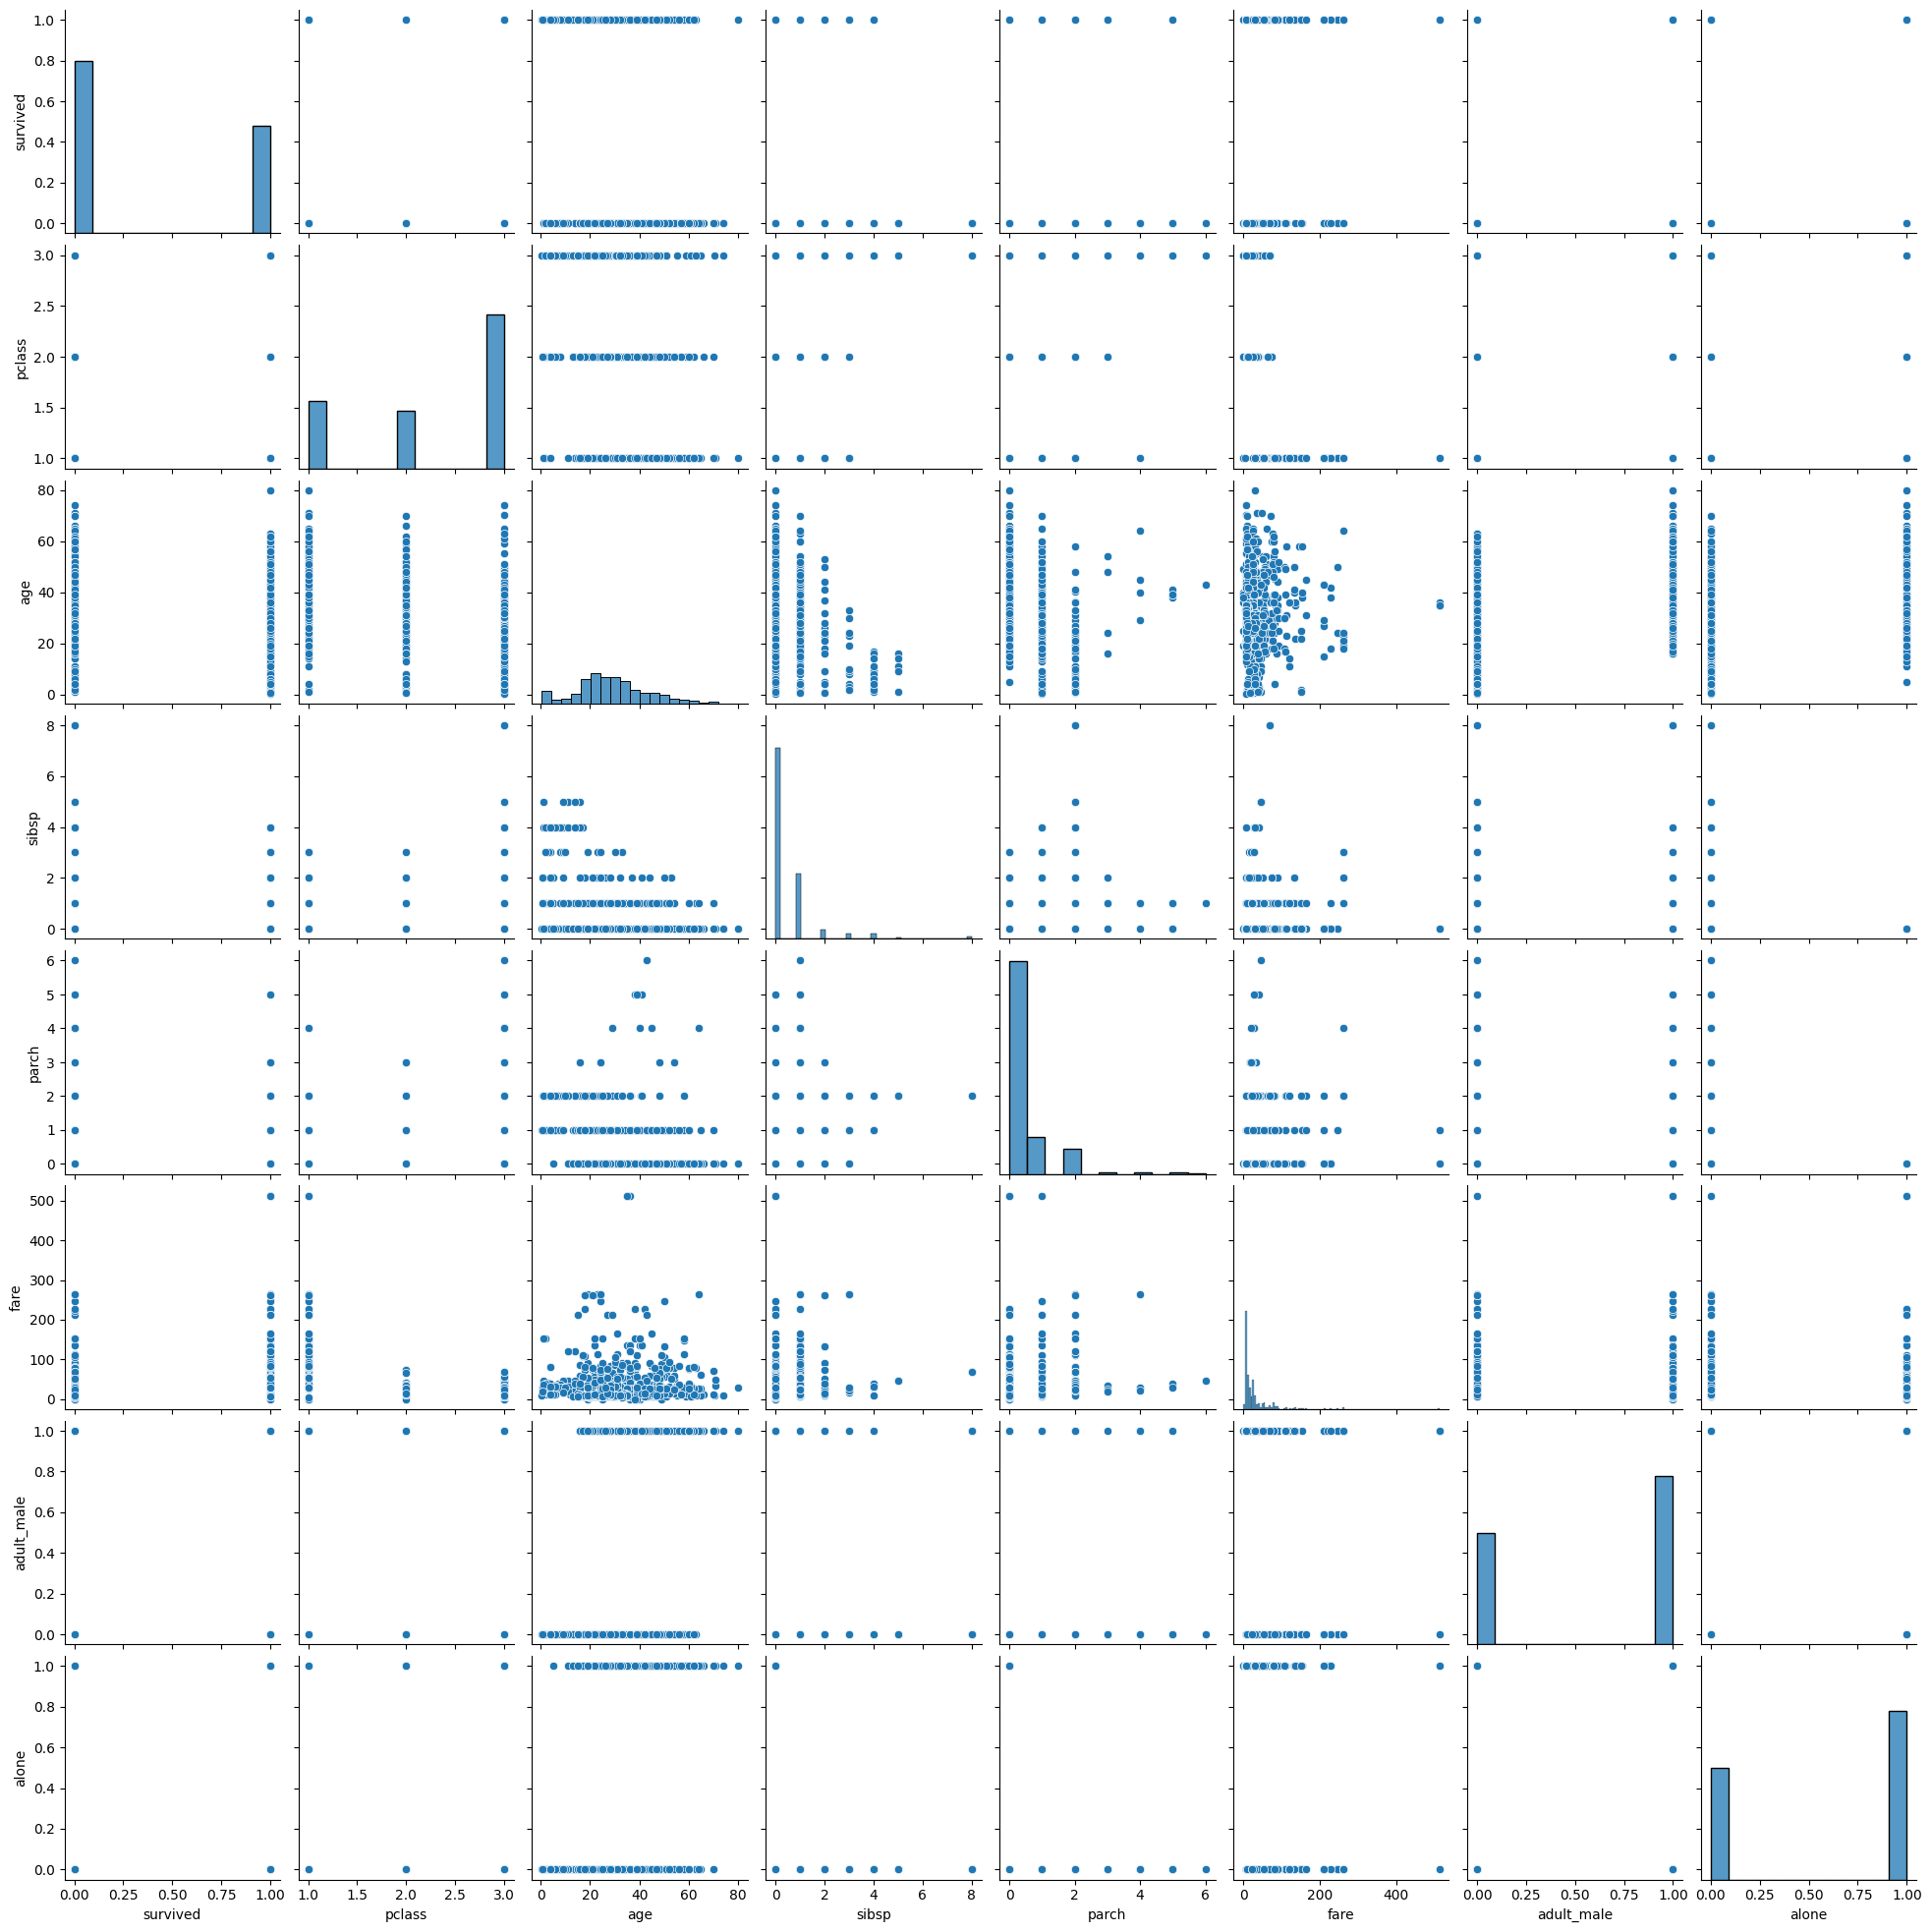

In [67]:
sns.pairplot(df)

<Axes: xlabel='age', ylabel='fare'>

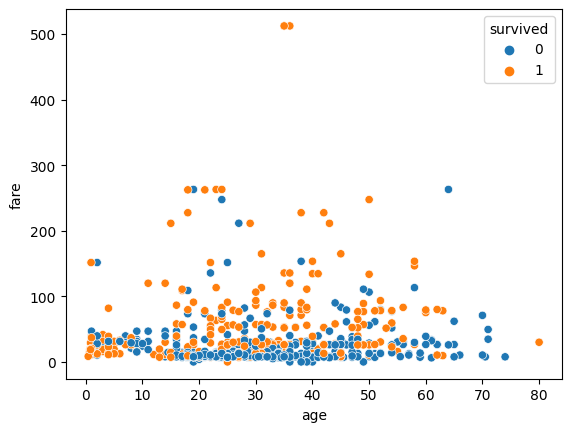

In [69]:
sns.scatterplot(x='age',y='fare',hue='survived',data=df)

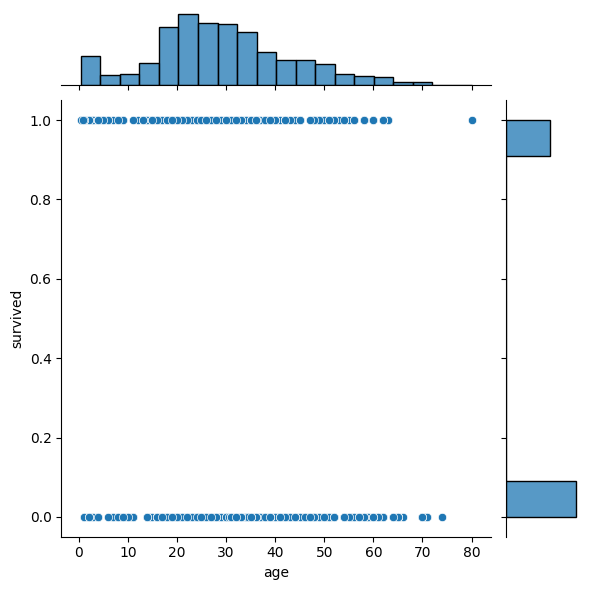

In [71]:
sns.jointplot(x='age',y='survived',data=df)